<a href="https://colab.research.google.com/github/esther-nyokabi/Financial-Inclusion-/blob/main/I_P_Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the question
# Specifiying the data analytic question

- Finding out how we can predict which individuals are most likely to have or use a bank account.

#Defining the metric for success
The objectives of this project will be met if the following can be determined:

- Insight into the state of financial inclusion in the countries: Kenya, Uganda, Rwanda, Tanzania
- Insight into some of the key demographic factors that might drive an individual's financial outcomes
- Prediction of individuals most likely to have or use a bank account

# Understanding the context
- Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

# Recording the experimental design taken
- We'll perform Exploratory Data Analysis, i.e Univariate, Bivariate and Multivariate Analysis to get the relationships and differences between different variables to come up with a prediction on individuals who are most likely to have or use a bank account

#The appropriateness of the available data to answer the given question
- The available data is deemed as appropriate as the data contains all variables that will be required to perform analysis by country and by either demographic factors such as: age, gender, level of education, income level, area or residence, employment, marital status among other factors that influence an individuals financial outcomes.

#Importing Libraries

In [ ]:
import pandas as pd # data manipulations
import numpy as np # for computations
import seaborn as sns # for visualizations
import matplotlib.pyplot as plt # for visualizations
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [ ]:
data = pd.read_csv("Financial Dataset - 1.csv")
data.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# Exploring the Dataset

In [ ]:
# Prieviewing the shapes of the datasets
data.shape

(23524, 13)

The data contains 16910 records and 13 columns

In [ ]:
# Checking the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
data.describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_1,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


# Cleaning the Data

In [ ]:
data.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
# renaming columns
data.rename(columns={'The relathip with head': 'relationship_with_head', 'Level of Educuation':'level_of_education'}, inplace = True)
data.columns

# Replacing columns with whitespaces with an underscore
data.columns = data.columns.str.replace(' ', '_')
data.columns

Index(['country', 'year', 'uniqueid', 'Has_a_Bank_account', 'Type_of_Location',
       'Cell_Phone_Access', 'household_size', 'Respondent_Age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of_education', 'Type_of_Job'],
      dtype='object')

In [ ]:
# previewing any missing data
data.isnull().sum().any()

True

In [ ]:
# The total count of missing values
data.isnull().sum().sum()

267

In [ ]:
# Total missing values for each feature
data.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has_a_Bank_account        36
Type_of_Location          15
Cell_Phone_Access         11
household_size            28
Respondent_Age            34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
level_of_education        29
Type_of_Job               30
dtype: int64

In [ ]:
# drop null values 
d = data.dropna()
d.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has_a_Bank_account        0
Type_of_Location          0
Cell_Phone_Access         0
household_size            0
Respondent_Age            0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
level_of_education        0
Type_of_Job               0
dtype: int64

In [ ]:
# Checking for duplicates
data.duplicated().sum()

0

(23343, 13)
(22725, 13)


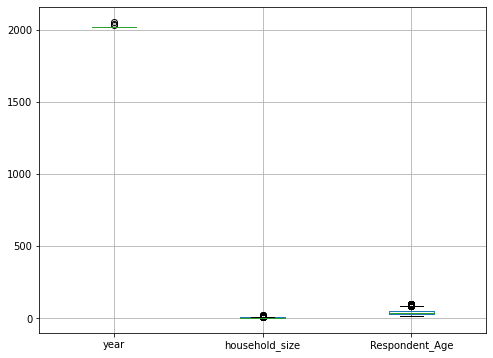

In [ ]:
# checking for outliers 
d.boxplot(figsize=(8, 6), fontsize=10)

# print size of the data with outliers present
print(d.shape)

# removing outliers
Q1 = d.quantile(0.25)
Q3 = d.quantile(0.75)
IQR = Q3 - Q1
df = d[~((d < (Q1 - 1.5 * IQR)) | (d > (Q3 + 1.5 * IQR))).any(axis=1)]

# print size of the data after dealing with outliers
print(df.shape)

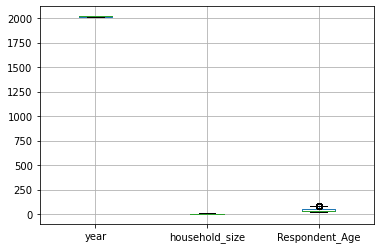

In [ ]:
# plot of the new data, without ouliers
df.boxplot()

In [ ]:
# checking for anomalies
# getting the quantiles
q1 = df['household_size'].quantile(.25)
q3 = df['household_size'].quantile(.75)

# calculating inter-quartile range using values from above
iqr_31_house = q3 - q1

# another way is to find quantiles using the percentiles from the numpy library
q1_h, q3_h = np.percentile(df['household_size'], [25, 75]) 
# IQR
iqr_31_h = q3_h - q1_h

# compare if the two values are similar
print(iqr_31_house, iqr_31_h)

3.0 3.0


# Variable Identification
- First, we identify independent and dependent variables. 

The challenge is to predict the likelihood of an individual to posses a bank account depending on age,education level,marital status,cellphone access,location, job type etc.

Thus, the dependent column is bank_account and the rest of columns are independent variable

# Exploratory Data Analysis

##**Univariate Analysis**

In [ ]:
# loading the variable definition file data to understand what each column means
data1 = pd.read_csv("VariableDefinitions.csv")
data1.head(5)

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"


#### Numerical Variables

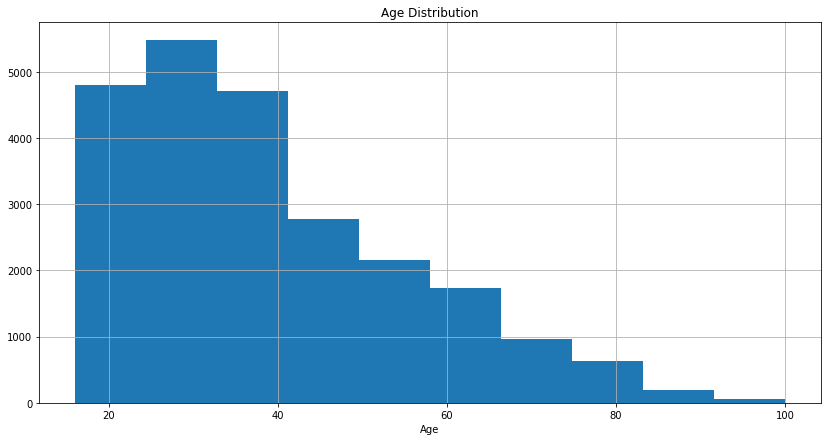

In [ ]:
# Let's explore age distribution using histogram
plt.figure(figsize=(14,7))
data.Respondent_Age.hist() 
plt.title("Age Distribution")
plt.xlabel('Age')
plt.show()

The majority of respondents from our dataset are between 20 - 40 years old, the minority being between 80-100

In [ ]:
data.columns

Index(['country', 'year', 'uniqueid', 'Has_a_Bank_account', 'Type_of_Location',
       'Cell_Phone_Access', 'household_size', 'Respondent_Age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of_education', 'Type_of_Job'],
      dtype='object')

Skew: 0.8034033566606451
Kurtosis: -0.01822759359603765


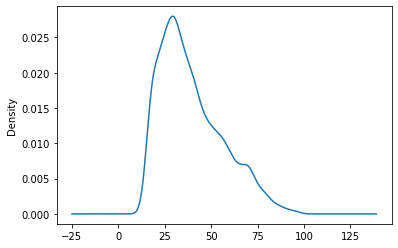

In [ ]:
data['Respondent_Age'].plot(kind='density')
print("Skew:" , data['Respondent_Age'].skew())
print("Kurtosis:" , data['Respondent_Age'].kurt())

- Respondent Age is positively skewed and has Playtkurtic kurtosis of 0.10

#### Categorical Variables

Text(0, 0.5, 'Individuals')

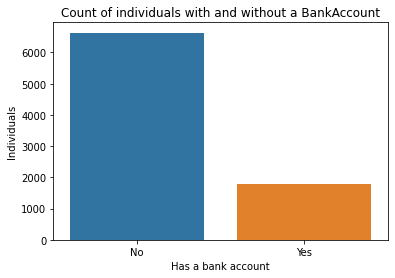

In [ ]:
# Let's explore the distribution of Bank Account count..how many individuals have or do not have bank accounts
ax = sns.countplot(data['Has_a_Bank_account'], order = data['Has_a_Bank_account'].value_counts().index)
# formatting and labelling axes
plt.title('Count of individuals with and without a BankAccount')
plt.xlabel('Has a bank account')
plt.ylabel('Individuals')

Quite a number of respondents lack a bank account

Rural    5516
Urban    2824
Name: Type_of_Location, dtype: int64

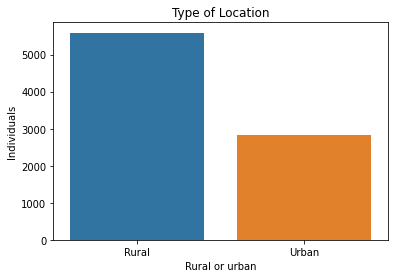

In [ ]:
# plot count plot for the type of location
ax = sns.countplot(data['Type_of_Location'], order = data['Type_of_Location'].value_counts().index)
plt.title("Type of Location")
plt.xlabel('Rural or urban')
plt.ylabel('Individuals')
# frequency table of the same for comparison
df['Type_of_Location'].value_counts()

Many of the respondents in our dataset reside in rural areas

Female    4801
Male      3539
Name: gender_of_respondent, dtype: int64

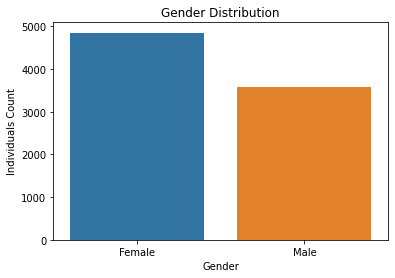

In [ ]:
# Let's explore the distribution of Gender of respondents using count
ax = sns.countplot(data['gender_of_respondent'], order = data['gender_of_respondent'].value_counts().index)
# formatting the plot, labelling axes
plt.title("Gender Distribution")
plt.xlabel('Gender')
plt.ylabel('Individuals Count')
# frequency table of the same for comparison
df['gender_of_respondent'].value_counts()

Females count is greater compared to male count

Text(0.5, 1.0, 'Country of Respondent Distribution')

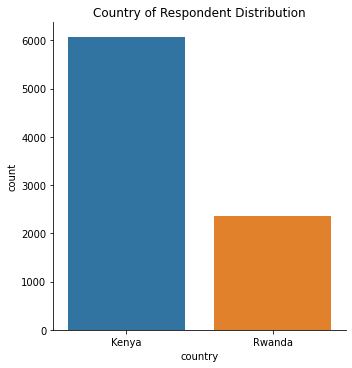

In [ ]:
# Let's explore the distribution of country of respondents using count

sns.catplot(x="country", kind="count", data=data)
plt.title("Country of Respondent Distribution")

Rwanda has the highest number of respondents followed by Kenya with Uganda having less respondents

In [ ]:
data.columns

Index(['country', 'year', 'uniqueid', 'Has_a_Bank_account', 'Type_of_Location',
       'Cell_Phone_Access', 'household_size', 'Respondent_Age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of_education', 'Type_of_Job'],
      dtype='object')

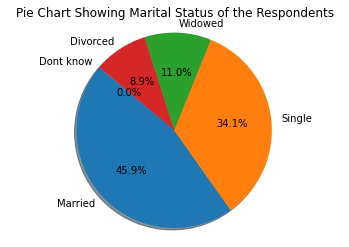

In [ ]:
# plot of the marital status of the respondents, order them in descending order
plt.pie(df['marital_status'].value_counts() ,labels=['Married','Single','Widowed','Divorced','Dont know'],autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart Showing Marital Status of the Respondents')
plt.show()

Married individuals participated more in the survey

Text(0.5, 1.0, 'Cellphone Acess Distribution')

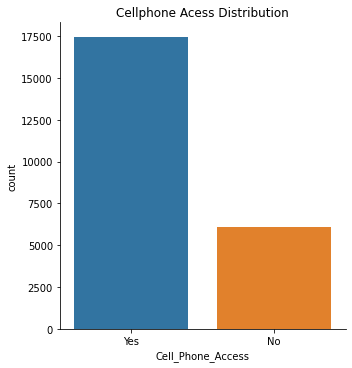

In [ ]:
# Let's explore the distribution of cellphone_access using count
sns.catplot(x="Cell_Phone_Access", kind="count", data=data)
plt.title("Cellphone Acess Distribution")


Text(0, 0.5, 'Number of respondents')

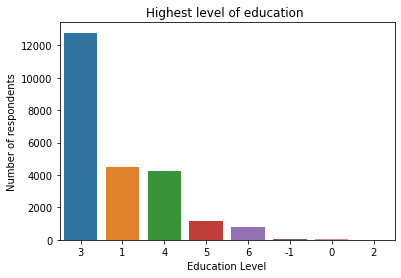

In [ ]:
# plotting a chart for the level of education
ax = sns.countplot(data['level_of_education'], order = data['level_of_education'].value_counts().index)
# formatting and labelling the chart
plt.title("Highest level of education ")
plt.xlabel("Education Level")
plt.ylabel("Number of respondents")
plt.xticks(rotation=90)

Primary education leads when we count the highest level of education from individuals in the dataset while vocational/Specialised training comes last

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

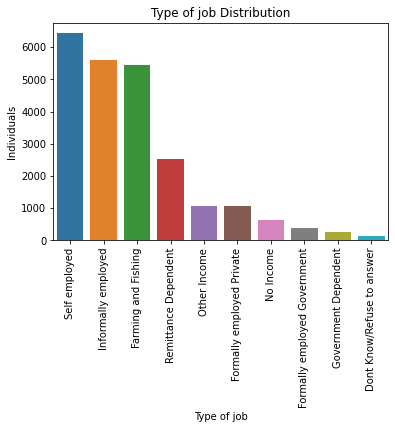

In [ ]:
# count plot for the type of job
ax = sns.countplot(data['Type_of_Job'], order = data['Type_of_Job'].value_counts().index)
# formatting and labelling the chart 
plt.title("Type of job Distribution")
plt.xlabel("Type of job")
plt.ylabel("Individuals")
plt.xticks(rotation=90)

Mostly, Individuals in our dataset do Farming and fishing as their job

### Measures of central tendency

In [ ]:
print(data['Respondent_Age'].mean())
print(data['Respondent_Age'].median())
print(data['Respondent_Age'].mode())

38.804299702000854
35.0
0    30.0
dtype: float64


In [ ]:
print(data['household_size'].mean())
print(data['household_size'].median())
print(data['household_size'].mode())

3.6818181818181817
3.0
0    2.0
dtype: float64


# BiVariate Analysis

In [ ]:
data.dtypes

country                    object
year                        int64
uniqueid                   object
Has_a_Bank_account         object
Type_of_Location           object
Cell_Phone_Access          object
household_size            float64
Respondent_Age            float64
gender_of_respondent       object
relationship_with_head     object
marital_status             object
level_of_education         object
Type_of_Job                object
dtype: object

In [ ]:
# We first convert the columns to categorical values for label encoding to easily find correlation of all columns
data["country"] = data["country"].astype('category').cat.codes
data["Has_a_Bank_account"] = data["Has_a_Bank_account"].astype('category').cat.codes
data["Type_of_Location"] = data["Type_of_Location"].astype('category').cat.codes
data["Cell_Phone_Access"] = data["Cell_Phone_Access"].astype('category').cat.codes
data["gender_of_respondent"] = data["gender_of_respondent"].astype('category').cat.codes
data["relationship_with_head"] = data["relationship_with_head"].astype('category').cat.codes
data['marital_status'] = data['marital_status'].astype('category').cat.codes
data["level_of_education"] = data["level_of_education"].astype('category').cat.codes
data["Type_of_Job"] = data["Type_of_Job"].astype('category').cat.codes
data.head()

,country,year,uniqueid,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,Type_of_Job
0,0,2018,uniqueid_1,1,0,1,3.0,24.0,0,5,2,4,9
1,0,2018,uniqueid_2,0,0,0,5.0,70.0,0,1,4,1,4
2,0,2018,uniqueid_3,1,1,1,5.0,26.0,1,3,3,6,9
3,0,2018,uniqueid_4,0,0,1,5.0,34.0,0,1,2,3,3
4,0,2018,uniqueid_5,0,1,0,8.0,26.0,1,0,3,3,5


In [ ]:
# Correlation
correlation = data.corr()
correlation

,country,year,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,Type_of_Job
country,1.000000,-0.092625,-0.163207,0.148296,-0.149253,-0.158963,-0.058726,-0.028989,0.129311,0.006876,-0.049896,0.377380
year,-0.092625,1.000000,0.108628,0.203674,-0.060470,-0.049344,-0.019570,0.001485,0.002345,-0.023259,0.169296,0.250768
Has_a_Bank_account,-0.163207,0.108628,1.000000,0.088840,0.212680,-0.018243,0.020373,0.114994,-0.071091,-0.038073,0.319418,-0.065555
Type_of_Location,0.148296,0.203674,0.088840,1.000000,-0.078875,-0.272319,-0.047336,0.010669,0.016298,0.077646,0.125128,0.364500
Cell_Phone_Access,-0.149253,-0.060470,0.212680,-0.078875,1.000000,0.100085,-0.103424,0.103003,-0.049033,-0.092928,0.248980,-0.147075
household_size,-0.158963,-0.049344,-0.018243,-0.272319,0.100085,1.000000,-0.119709,0.012909,0.088386,-0.109401,-0.006666,-0.180743
Respondent_Age,-0.058726,-0.019570,0.020373,-0.047336,-0.103424,-0.119709,1.000000,0.012614,-0.151236,0.220216,-0.351177,-0.102911
gender_of_respondent,-0.028989,0.001485,0.114994,0.010669,0.103003,0.012909,0.012614,1.000000,-0.467862,-0.100356,0.117455,-0.031229
relationship_with_head,0.129311,0.002345,-0.071091,0.016298,-0.049033,0.088386,-0.151236,-0.467862,1.000000,-0.139801,-0.018053,0.040724
marital_status,0.006876,-0.023259,-0.038073,0.077646,-0.092928,-0.109401,0.220216,-0.100356,-0.139801,1.000000,-0.115989,0.057607


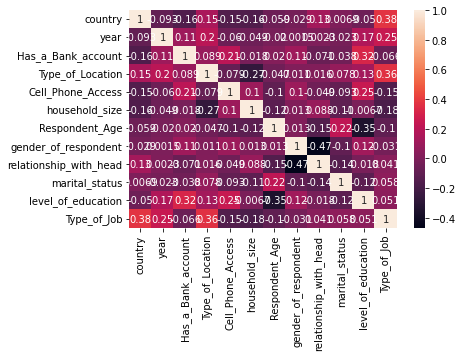

In [ ]:
# Correlation heatmap
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

### Categorical Vs Categorical

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

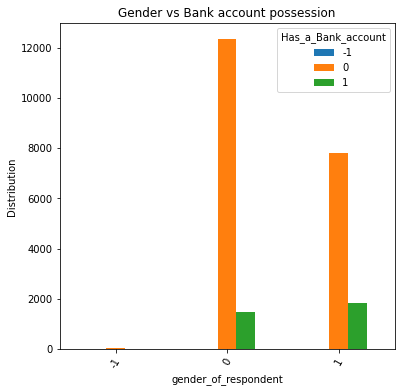

In [ ]:
# Crosstab dataframe
gender = pd.crosstab(index=data['gender_of_respondent'], columns=data['Has_a_Bank_account'])

# plot of the gender to bank account possession
gender.plot(kind="bar", figsize=(6,6))

# labelling chart
plt.title("Gender vs Bank account possession")
plt.ylabel("Distribution")

-  The number of males in our dataset are few but are most likely to own a bank account compared to females.

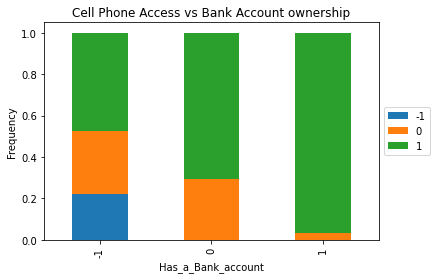

In [ ]:
#People from which kind of jobs are most likely to own a bank account
CellPhone = data.groupby('Has_a_Bank_account')['Cell_Phone_Access'].value_counts(normalize=True).unstack()
CellPhone.plot(kind='bar', stacked='True')

# labeling our y axis
plt.ylabel("Frequency")

# Creating a key/legend for our chart
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

# Adding a title
plt.title("Cell Phone Access vs Bank Account ownership")

# Displaying our chart
plt.show()

-  Individuals with access to CellPhones have majorly opened a Bank Account compared to individuals with no cellphone access

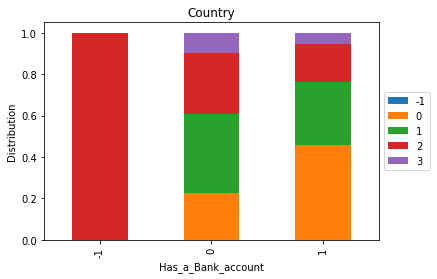

In [ ]:
# Country where people are likely to own a bank account
Country = data.groupby('Has_a_Bank_account')['country'].value_counts(normalize=True).unstack()
Country.plot(kind='bar', stacked='True')

# labelling our y axis
plt.ylabel("Distribution")

# Creating a key/legend for our chart
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

# Title
plt.title("Country")

# Displaying our chart
plt.show()

- Respondents in Kenya have majorly opened a Bank Account

Has_a_Bank_account  -1      0     1
Type_of_Location                   
-1                   8      7     0
 0                  11  12659  1668
 1                  17   7513  1641


Text(0, 0.5, 'Distribution')

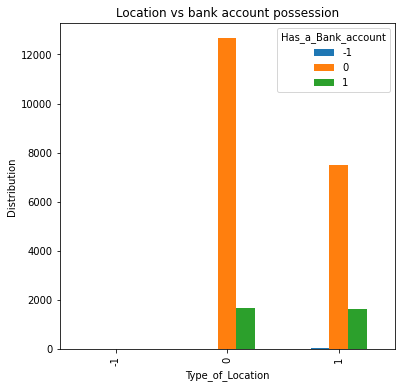

In [ ]:
# create crosstab dataframe
location = pd.crosstab(index=data['Type_of_Location'], columns=data['Has_a_Bank_account'])
print(location)
# plot chart
location.plot(kind="bar", figsize=(6,6))
# label chart
plt.title("Location vs bank account possession")
plt.ylabel("Distribution")

Respondents in Rural areas many but their comparison with bank account ownership is not in tandem

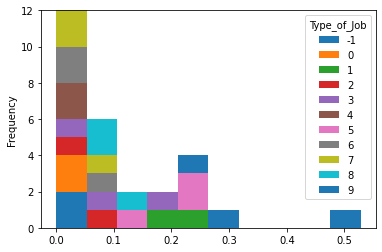

In [ ]:
# People from which type of jobs are most likely to own a bank account
Job = data.groupby('Has_a_Bank_account')['Type_of_Job'].value_counts(normalize=True).unstack()
Job.plot(kind='hist', stacked='True')
JobType = data['Has_a_Bank_account'].value_counts()

- From the output, we can conclude that Individuals who do farming and fishing are most likely to have a bank account and those who are informally employed are less likely to have a bank account

# Multi-Variate Analysis

In [ ]:
x = data.drop(['uniqueid','Has_a_Bank_account','Respondent_Age','household_size'],axis=1)
y = data['Has_a_Bank_account']

In [ ]:
# Dividing the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Performing feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_test

NameError: ignored

In [ ]:
# Performing PCA with Scikit-Learn
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
variance = pca.explained_variance_ratio_
variance

array([0.20096492, 0.17303076, 0.14547272, 0.11975838, 0.10420868,
       0.07777997, 0.07447442, 0.0548376 , 0.04947255])

- The first four variables cause the highest variance

In [ ]:
# Training and Making Predictions using Random forest classifier to evaluate the performance of PCA
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [ ]:
# Evaluating the Performance using a confusion matrix and finding the accuracy of the prediction.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print('Accuracy' , accuracy_score(y_test, y_pred))

Accuracy 0.8495217853347503


- From the observation above, the model achieved an accuracy of 84.9% which shows that the model is a good fit and could be used to predict whether an individual has a bank account or not.

In [ ]:
# Performing LDA on the dataset with dropped Nan values
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LD
lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

#Divideing data into training and test sets
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Confusion matrix and accuracy score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[   0    9    0]
 [   0 3870  127]
 [   0  495  204]]
Accuracy0.8658873538788523


#Conclusion

More refined data might increase the prediction accuracy of the data.